## Bit Coin Prediction 

#### Importing the libraries 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset and understanding the data 

In [3]:
data=pd.read_csv('bitcoinfinal(4).csv',header=None)
data.columns = ['Months','Price']

In [4]:
data.head()

,Months,Price
0,0,217.4
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7


In [5]:
from datetime import date
from dateutil.relativedelta import relativedelta
for i in range(0,len(data.Months)):
    data.Months[i] = date(2018,1,1) + relativedelta(months=+i)

data.head()

,Months,Price
0,2018-01-01,217.4
1,2018-02-01,255.7
2,2018-03-01,244.3
3,2018-04-01,236.1
4,2018-05-01,228.7


In [6]:
data = data.set_index('Months')
data.head()

,Price
Months,
2018-01-01,217.4
2018-02-01,255.7
2018-03-01,244.3
2018-04-01,236.1
2018-05-01,228.7


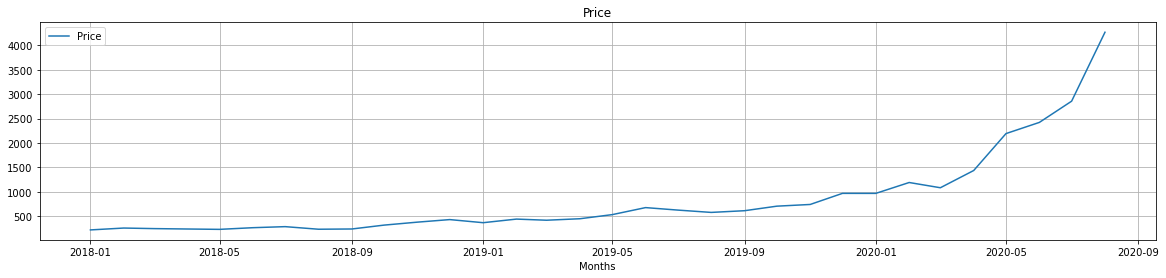

In [7]:
data.plot(figsize=(20, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Price')
plt.show(block=False)

In [8]:
train_len = 29
train = data[0:train_len] # first 29 months as training set
test = data[train_len:] # last months as out-of-time test set

#### Naive method 

In [9]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Price'][train_len-1]

In [10]:
y_hat_naive['naive_forecast']

Months
2020-06-01    2191.8
2020-07-01    2191.8
2020-08-01    2191.8
Name: naive_forecast, dtype: float64

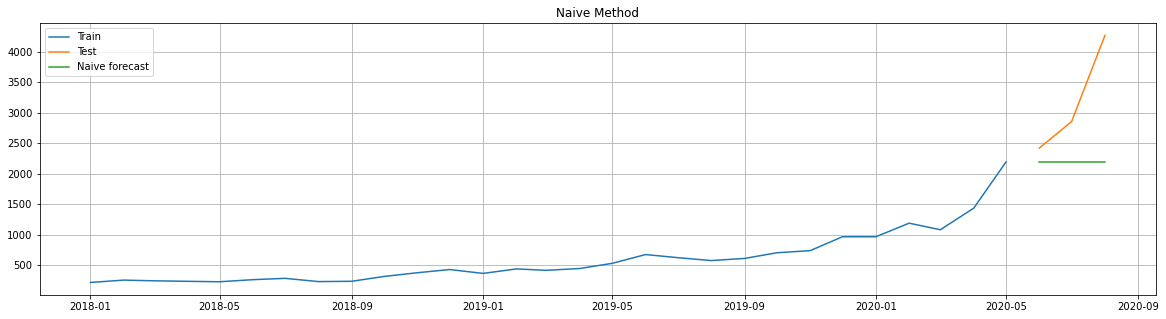

In [11]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_naive['naive_forecast'])/test['Price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


#### Simple avaerage method 

In [13]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Price'].mean()

In [14]:
train['Price'].mean()

595.7517241379311

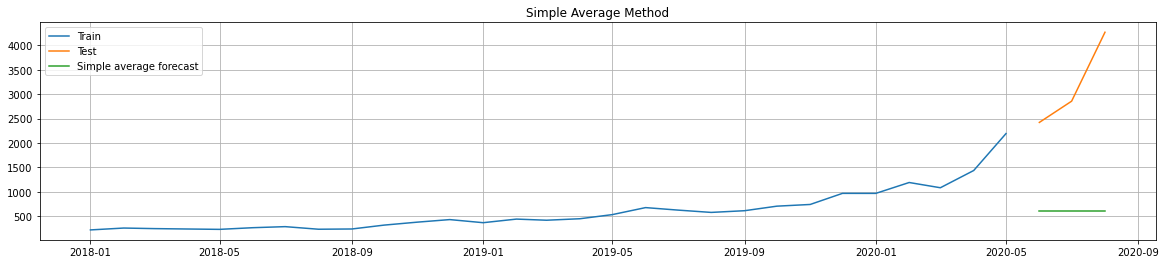

In [15]:
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [16]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_avg['avg_forecast'])/test['Price'])*100,2)

results= pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple average method,2703.73,80.19


#### Simple moving average method - 12 months 

In [17]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

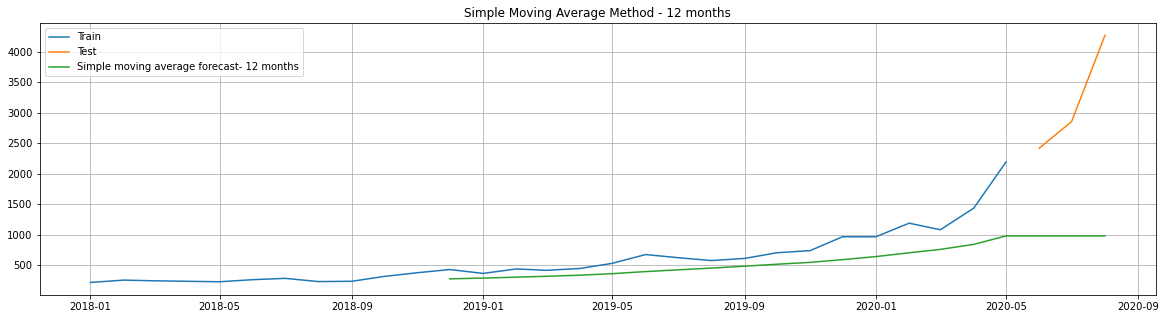

In [18]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast- 12 months')
plt.legend(loc='best')
plt.title('Simple Moving Average Method - 12 months')
plt.show()

In [19]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

results  = pd.DataFrame({'Method':['Simple moving average forecast-12 months'], 'RMSE': [rmse],'MAPE': [mape] })

results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast-12 months,2338.94,67.42


#### Simple moving average method - 6 months 

In [20]:
y_hat_sma = data.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

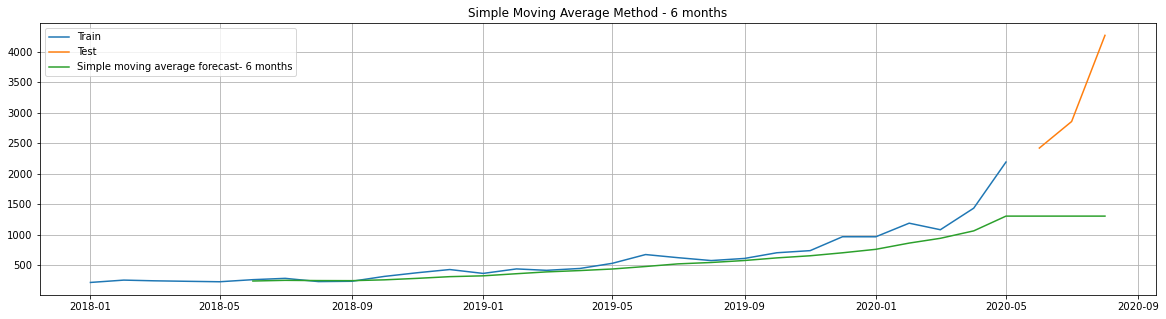

In [21]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast- 6 months')
plt.legend(loc='best')
plt.title('Simple Moving Average Method - 6 months')
plt.show()

In [22]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

results  = pd.DataFrame({'Method':['Simple moving average forecast-6 months'], 'RMSE': [rmse],'MAPE': [mape] })

results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast-6 months,2035.79,56.61


In [23]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

#### Simple moving average method - 3 months 

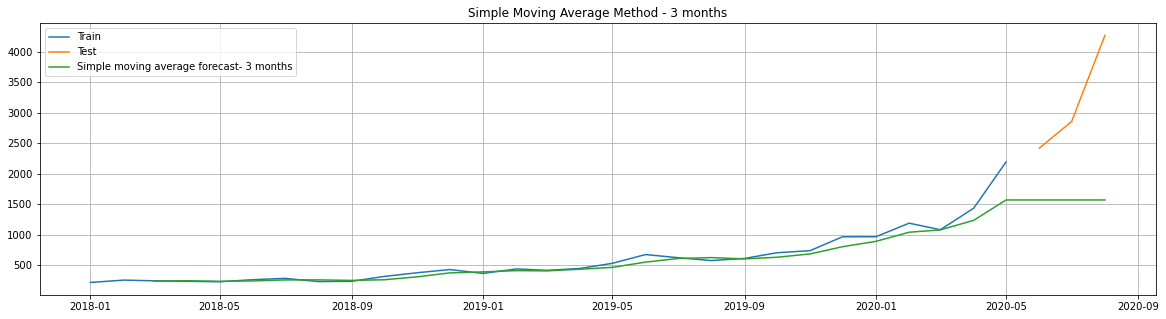

In [24]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast- 3 months')
plt.legend(loc='best')
plt.title('Simple Moving Average Method - 3 months')
plt.show()

In [25]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

results  = pd.DataFrame({'Method':['Simple moving average forecast-3 months'], 'RMSE': [rmse],'MAPE': [mape] })

results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast-3 months,1794.92,47.81


In [26]:
y_hat_sma = data.copy()
ma_window12 =12
y_hat_sma['sma_forecast12'] = data['Price'].rolling(ma_window12).mean()
y_hat_sma['sma_forecast12'][train_len:] = y_hat_sma['sma_forecast12'][train_len-1]
ma_window6 =6
y_hat_sma['sma_forecast6'] = data['Price'].rolling(ma_window6).mean()
y_hat_sma['sma_forecast6'][train_len:] = y_hat_sma['sma_forecast6'][train_len-1]
ma_window3 =3
y_hat_sma['sma_forecast3'] = data['Price'].rolling(ma_window3).mean()
y_hat_sma['sma_forecast3'][train_len:] = y_hat_sma['sma_forecast3'][train_len-1]
ma_window1 =1
y_hat_sma['sma_forecast1'] = data['Price'].rolling(ma_window1).mean()
y_hat_sma['sma_forecast1'][train_len:] = y_hat_sma['sma_forecast1'][train_len-1]
ma_window9 =9
y_hat_sma['sma_forecast9'] = data['Price'].rolling(ma_window9).mean()
y_hat_sma['sma_forecast9'][train_len:] = y_hat_sma['sma_forecast9'][train_len-1]

In [27]:
y_hat_sma.head(20)

,Price,sma_forecast12,sma_forecast6,sma_forecast3,sma_forecast1,sma_forecast9
Months,,,,,,
2018-01-01,217.4,NaN,NaN,NaN,217.4,NaN
2018-02-01,255.7,NaN,NaN,NaN,255.7,NaN
2018-03-01,244.3,NaN,NaN,239.133333,244.3,NaN
2018-04-01,236.1,NaN,NaN,245.366667,236.1,NaN
2018-05-01,228.7,NaN,NaN,236.366667,228.7,NaN
2018-06-01,262.9,NaN,240.850000,242.566667,262.9,NaN
2018-07-01,284.5,NaN,252.033333,258.700000,284.5,NaN
2018-08-01,231.4,NaN,247.983333,259.600000,231.4,NaN
2018-09-01,236.5,NaN,246.683333,250.800000,236.5,244.166667


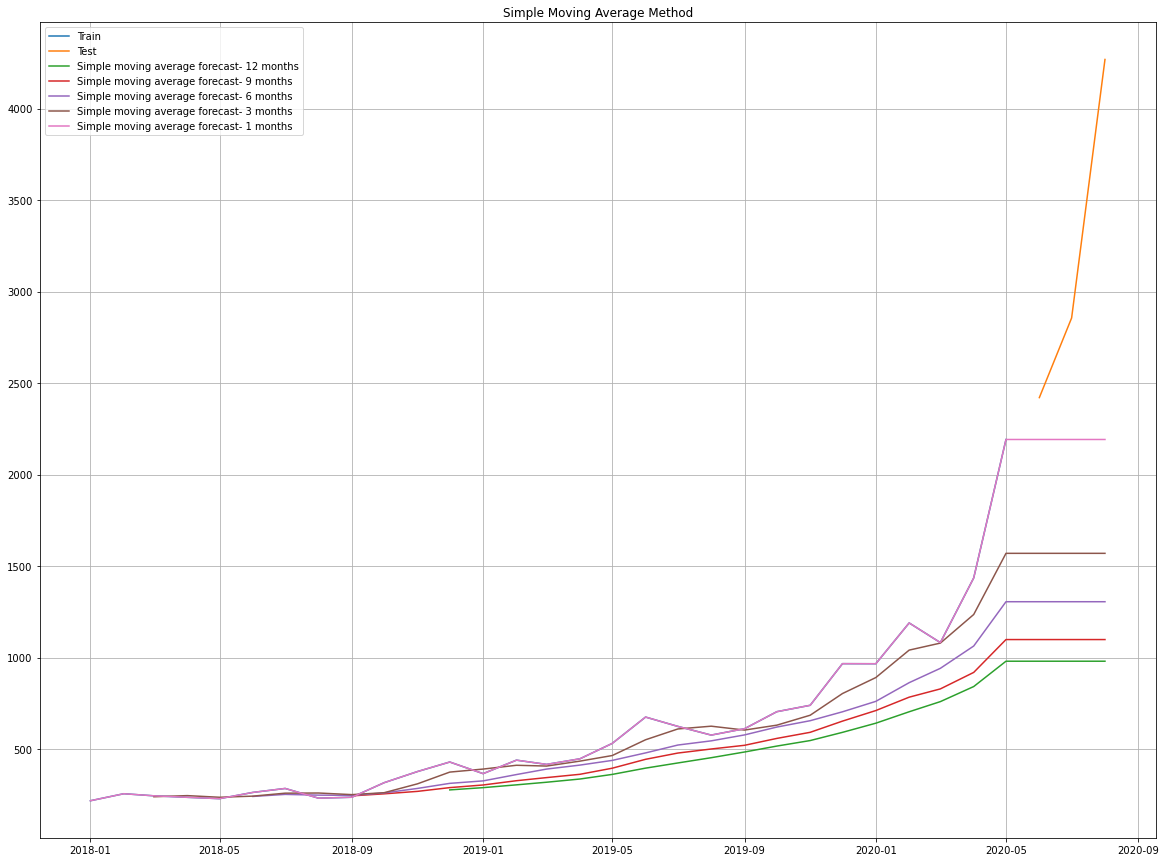

In [28]:
plt.figure(figsize=(20,15))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast12'], label='Simple moving average forecast- 12 months')
plt.plot(y_hat_sma['sma_forecast9'], label='Simple moving average forecast- 9 months')
plt.plot(y_hat_sma['sma_forecast6'], label='Simple moving average forecast- 6 months')
plt.plot(y_hat_sma['sma_forecast3'], label='Simple moving average forecast- 3 months')
plt.plot(y_hat_sma['sma_forecast1'], label='Simple moving average forecast- 1 months')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

#### Simple exponential smoothing 

In [29]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Price'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


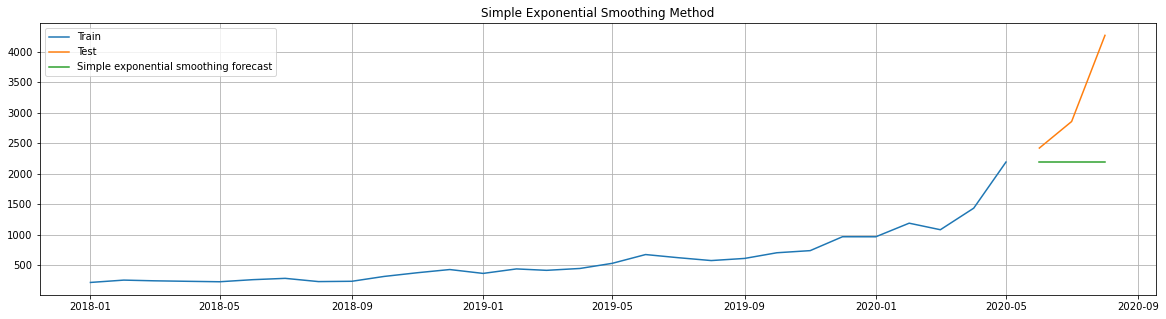

In [30]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [31]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_ses['ses_forecast'])/test['Price'])*100,2)

results= pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] }) 
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,1268.86,27.25


#### Holt'z exponential smoothing method 

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Price']) ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9999999850988388, 'smoothing_trend': 0.419932817069107, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 202.4307001951609, 'initial_trend': 14.512275167345432, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [33]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_holt['holt_forecast'])/test['Price'])*100,2)

results = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Holt's exponential smoothing method,501.75,10.99


#### Summary
Based on the different methods performed it is found to be that the Holt'z exponential smoothing method is found to be better for predicting the price of bit coin.